In [13]:
import matplotlib.pylab as plt
from models.scripts.utils import load_csv, split_date, split_data_frame, apply_moving_average_for_roc, impute_rolling_median, add_seasonality, create_lags

In [14]:
df = load_csv('data/xmr_lunarcrush_timeseries.csv')
df = split_date(df, 'time')
df = impute_rolling_median(df, 5)
df = add_seasonality(df)

/Users/lucapetracca/Documents/GitHub/Transformers-Financial-Time-Series-Forecasting/models/scripts/utils.py:153: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[column].fillna(method='bfill', inplace=True)  # Backfill to address initial NaNs


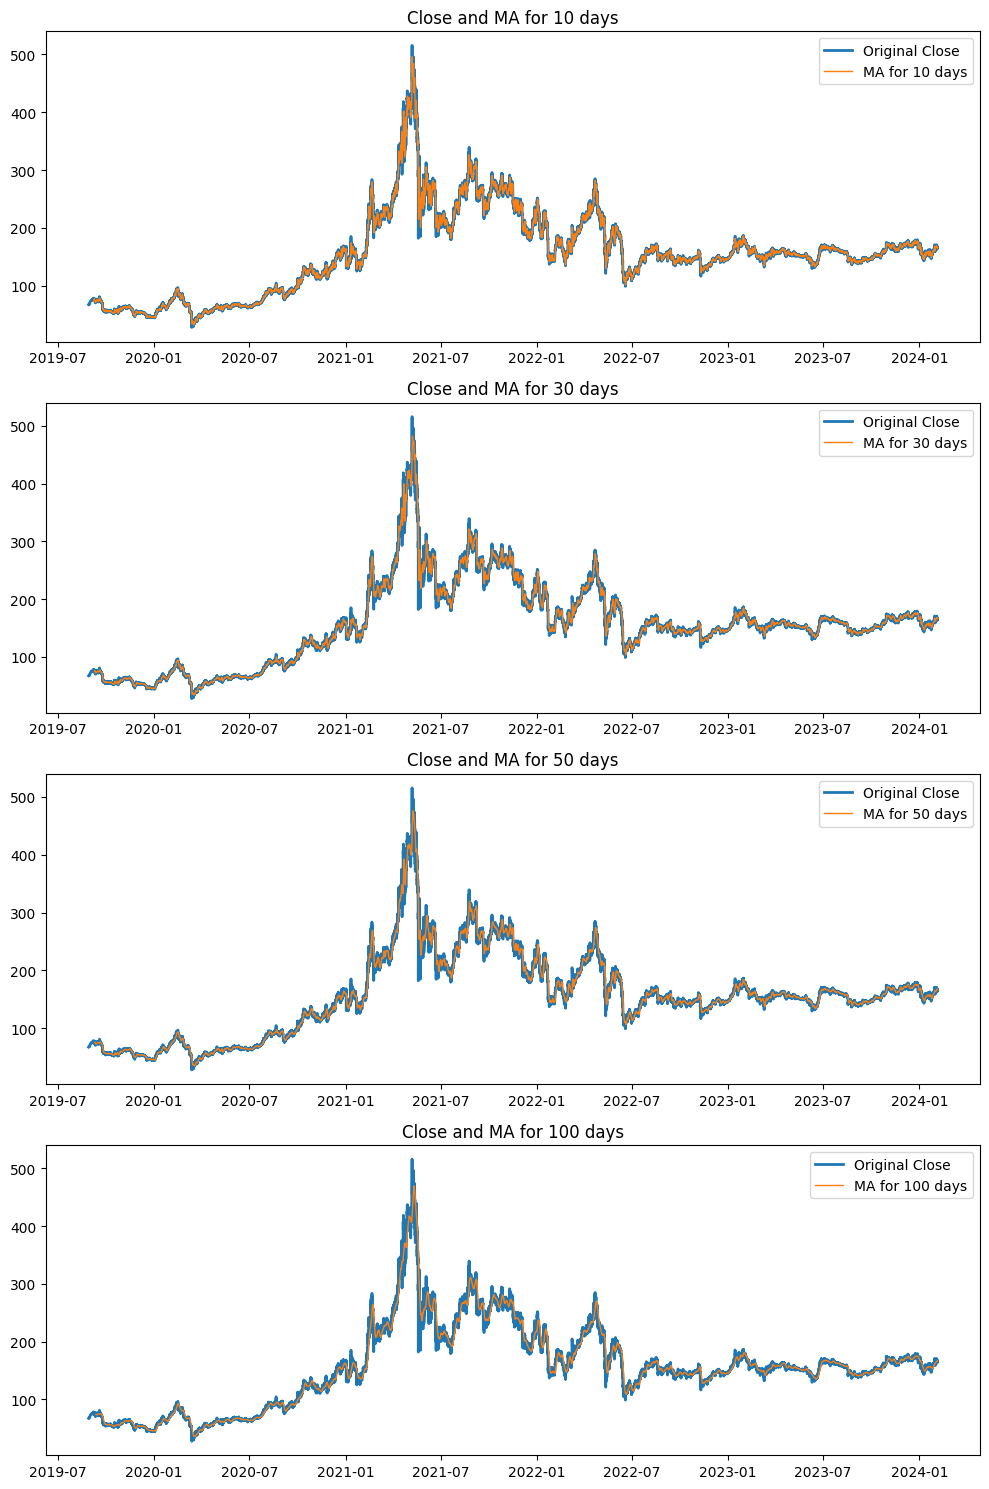

In [15]:
ma_day = [10, 30, 50, 100]
df_ma = df.copy()

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df_ma[column_name] = df_ma['close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=len(ma_day), ncols=1, figsize=(10, 15))

for i, ma in enumerate(ma_day):
    column_name = f"MA for {ma} days"
    axes[i].plot(df_ma['time'],df_ma['close'], label='Original Close', linewidth=2)
    axes[i].plot(df_ma['time'],df_ma[column_name], label=f'{column_name}', linewidth=1)
    axes[i].set_title(f'Close and {column_name}')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [16]:
train, val, test = split_data_frame(df_ma)

In [17]:
train = create_lags(train, 3)
val = create_lags(val, 3)
test = create_lags(test, 3)

In [18]:
train = apply_moving_average_for_roc(dataframe=train, ma_type='ma', roc_window=10)
test = apply_moving_average_for_roc(dataframe=test, ma_type='ma', roc_window=10)
val = apply_moving_average_for_roc(dataframe=val, ma_type='ma', roc_window=10)

In [19]:
train.tail()

,asset_id,timestamp,time,open,close,high,low,volume,volume_24h,market_cap,...,MA for 10 days,MA for 30 days,MA for 50 days,MA for 100 days,lag_1,lag_2,lag_3,ROC_0,ROC_1,ROC_2
27054,13,1665309600,2022-10-09 10:00:00,148.610886,148.610886,148.720786,148.407462,4114770.92,50435370.73,2.702484e+09,...,147.707555,147.297433,146.801556,146.648161,147.882341,148.053691,148.027665,0,1,0
27055,13,1665313200,2022-10-09 11:00:00,148.470835,148.470835,148.748333,148.380797,3071140.25,48493463.29,2.699938e+09,...,147.871578,147.380343,146.814065,146.655026,148.610886,147.882341,148.053691,0,1,0
27056,13,1665316800,2022-10-09 12:00:00,148.585865,148.585865,148.957337,148.585865,4094135.63,48130511.61,2.702035e+09,...,147.979871,147.434872,146.832115,146.671250,148.470835,148.610886,147.882341,0,1,0
27057,13,1665320400,2022-10-09 13:00:00,148.600533,148.600533,148.600533,147.658680,7064740.52,51712314.87,2.702302e+09,...,148.080961,147.463686,146.860348,146.701636,148.585865,148.470835,148.610886,0,1,0
27058,13,1665324000,2022-10-09 14:00:00,147.637932,147.637932,147.783596,147.194106,5078751.54,51905109.04,2.684802e+09,...,148.095707,147.483507,146.884959,146.724246,148.600533,148.585865,148.470835,0,1,0


### Exponential Moving Average

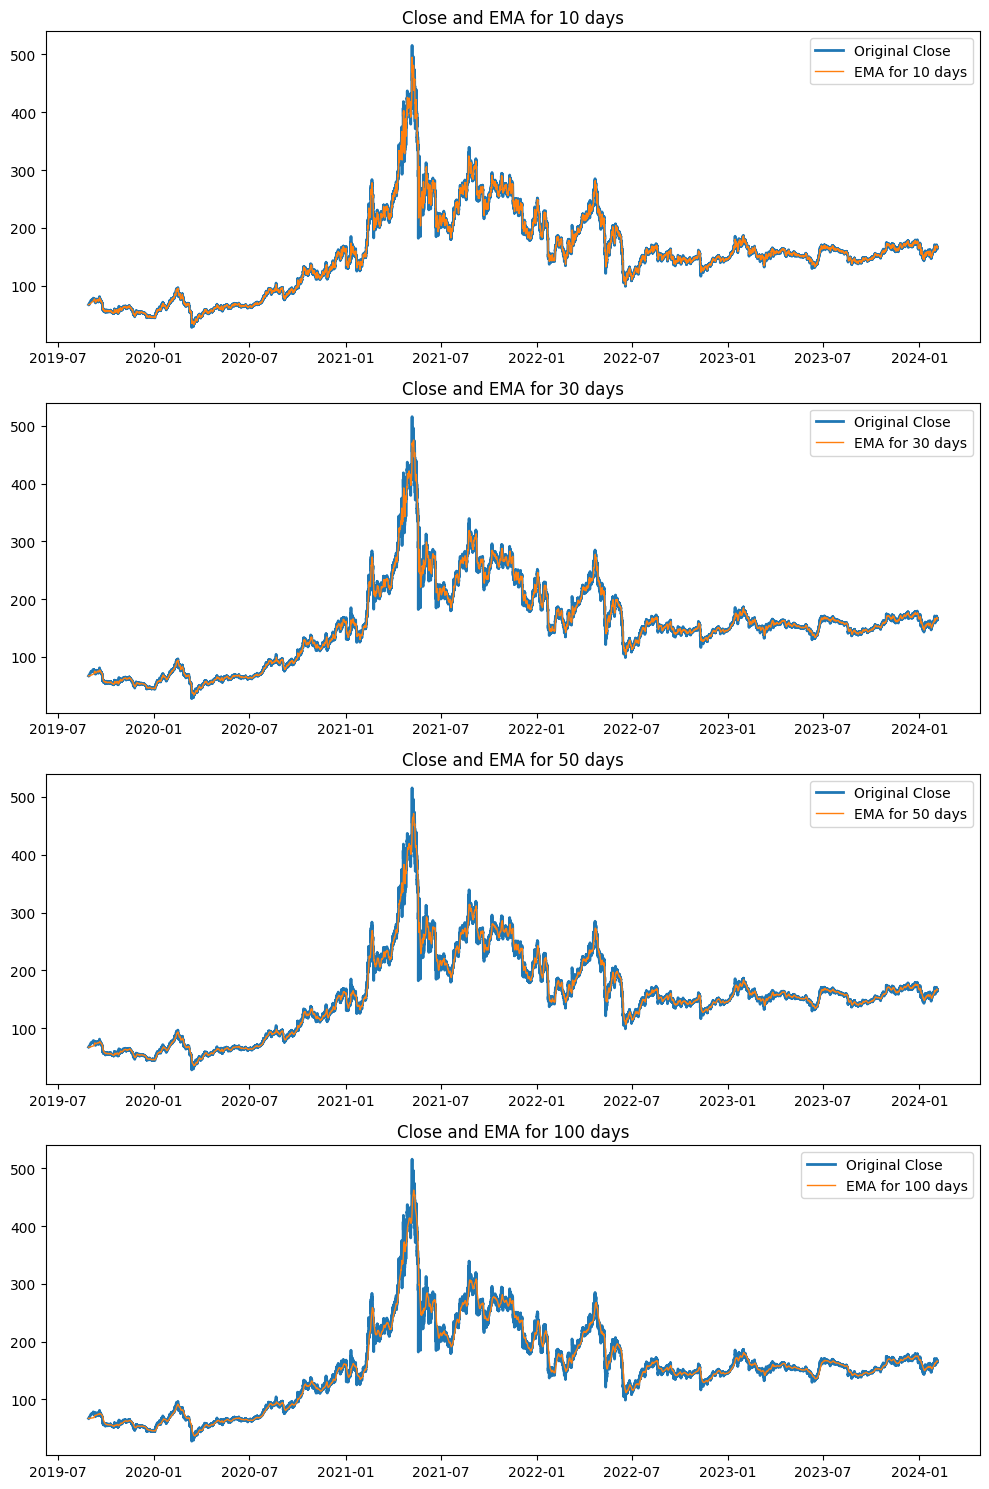

In [20]:
ma_day = [10, 30, 50, 100]
df_ema = df.copy()
for ma in ma_day:
    ema_column_name = f"EMA for {ma} days"
    df_ema[ema_column_name] = df_ema['close'].ewm(span=ma, adjust=False).mean()

fig, axes = plt.subplots(nrows=len(ma_day), ncols=1, figsize=(10, 15))

for i, ma in enumerate(ma_day):
    ema_column_name = f"EMA for {ma} days"
    axes[i].plot(df_ema['time'], df_ema['close'], label='Original Close', linewidth=2)
    axes[i].plot(df_ema['time'], df_ema[ema_column_name], label=f'{ema_column_name}', linewidth=1)
    axes[i].set_title(f'Close and {ema_column_name}')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [21]:
train, val, test = split_data_frame(df_ema)

train = create_lags(train, 3)
val = create_lags(val, 3)
test = create_lags(test, 3)

train = apply_moving_average_for_roc(dataframe=train, ma_type='ema', roc_window=10)
test = apply_moving_average_for_roc(dataframe=test, ma_type='ema', roc_window=10)
val = apply_moving_average_for_roc(dataframe=val, ma_type='ema', roc_window=10)

In [22]:
train.tail()

,asset_id,timestamp,time,open,close,high,low,volume,volume_24h,market_cap,...,EMA for 10 days,EMA for 30 days,EMA for 50 days,EMA for 100 days,lag_1,lag_2,lag_3,ROC_0,ROC_1,ROC_2
27054,13,1665309600,2022-10-09 10:00:00,148.610886,148.610886,148.720786,148.407462,4114770.92,50435370.73,2.702484e+09,...,147.771623,147.292155,147.047797,146.506123,147.882341,148.053691,148.027665,0,1,1
27055,13,1665313200,2022-10-09 11:00:00,148.470835,148.470835,148.748333,148.380797,3071140.25,48493463.29,2.699938e+09,...,147.898753,147.368199,147.103602,146.545028,148.610886,147.882341,148.053691,0,1,1
27056,13,1665316800,2022-10-09 12:00:00,148.585865,148.585865,148.957337,148.585865,4094135.63,48130511.61,2.702035e+09,...,148.023682,147.446758,147.161730,146.585440,148.470835,148.610886,147.882341,0,1,1
27057,13,1665320400,2022-10-09 13:00:00,148.600533,148.600533,148.600533,147.658680,7064740.52,51712314.87,2.702302e+09,...,148.128564,147.521195,147.218154,146.625343,148.585865,148.470835,148.610886,0,1,1
27058,13,1665324000,2022-10-09 14:00:00,147.637932,147.637932,147.783596,147.194106,5078751.54,51905109.04,2.684802e+09,...,148.039358,147.528726,147.234616,146.645395,148.600533,148.585865,148.470835,0,1,1
